# <span style="color:red"> Lezione 09 </span>
## <span style="color:green"> Esercizio 09.1 </span>

Ho implementato un algoritmo genetico per risolvere il problema del commesso viaggiatore. Ho cercato di risolvere in questo modo due differenti problemi del commesso viaggiatore: 
1. minimizzare il tragitto tra 34 punti disposti casualmente su una circonferenza
2. minimizzare il tragitto tra 34 punti disposti casualmente su un piano

Ovviamente il primo dei due percorsi è stato scelto come test, per assicurarsi del corretto funzionamento dell'algoritmo. Ogni generazione dell'algoritmo genetico comprende 100 diversi percorsi e sono state usate $2 \cdot 10^4 $ generazioni per assicurare la convergenza dell'algoritmo al percorso corretto. 

La fitness $\mathcal{F}$ che l'algoritmo intende minimizzare è la lunghezza totale del percorso. Ogni percorso è composto dai numeri interi da 1 a 34. Poichè una numerazione analoga è stata data ai punti che compongono il tragitto da compiere, l'ordine in cui appaiono in un percorso questi 34 numeri indica la soluzione del problema. Per evitare di introdurre degenerazione nella soluzione a causa dell'arbitarietà del punto di partenza, ho scelto di prendere la prima posizione $p_1$ di ogni percorso uguale ad 1.

Come generazione di partenza, sono stati generati 100 percorsi con $p_1=1$ e le altre posizioni scelte casualmente (avendo ovviamente cura che ogni percorso rimanga valido, ovvero contenga una sola volta tutti i numeri da 1 a 34). Poi a partire da quella si sono costruite iterativamente le generazioni successive.

Data una generazione, si passa alla successiva tramite la seguente procedura: 
### 1. Scelta dei "genitori"
Per ognuno dei 100 percorsi $\bar{x_i}$ della nuova generazione viene scelta una coppia "madre"-"padre" proveniente dalla generazione precedente di percorsi $x_i$. Per operare questa scelta, per prima cosa gli $x_i$ vengono ordinati in modo che $x_1$ abbia la fitness $\mathcal{F}$ più bassa e $x_{100}$ quella più alta. Quindi vengono scelti i due percorsi con la $i$ determinata dalla formula:
$$i = \lfloor 100 \cdot \mathcal{U}(0,1)^\alpha \rfloor +1 ,$$
dove $\lfloor \ \rfloor$ indica la parte intera, approssimata sempre per difetto, $\mathcal{U}(0,1)$ una distribuzione di probabilità uniforme compresa tra 0 e 1, ed $\alpha $ è una costante scelta in modo da far convergere velocemente l'algoritmo senza che esso rimanga incastrato in un minimo locale. Dopo alcune prove, ho scelto $\alpha = 4$. In questo modo la scelta dei "genitori" ha un bias verso i percorsi con fitness più bassa. 

### 2. Generazione del "figlio" e crossing-over
Scelti i "genitori", il "figlio" viene generato come una copia della "madre", poi ha una probabilità dell'80% di compiere un crossing-over con il "padre". Questo crossing-over avviene così: 
1. si scelgono casualmente due numeri interi: $\lambda = \mathcal{U}(3,29)$ e $\iota = \mathcal{U}(2,34-\lambda)$
2. si prende il percorso del figlio e si tronca a partire dalla posizione $p_\iota$ fino alla $p_{\iota + \lambda}$ 
3. si riempie la parte troncata con i numeri mancanti nell'ordine in cui appaiono sul percorso del "padre"

### 3. Applicazione delle mutazioni
Generato un figlio in questo modo, vengono applicate quattro mutazioni diverse, ognuna con la sua probabilità $\mathcal{P}$ di avvenire:
1. **Pair mutation** ($\mathcal{P}=0.1$) scambio una $p_i$ casuale con la successiva,
2. **Jump mutation** ($\mathcal{P}=0.1$) prendo un blocco di tre posizioni in un percorso $p_i$,...,$p_{i+3}$ e ne scambio la posizione con un blocco di altre tre posizioni contigue all'interno del percorso (scelto casualmente)
3. **Single jump mutation** ($\mathcal{P} = 0.15$) prendo a posizione casuale nel percorso e la scambio con un'altra posizione casuale
4. **Inversion mutation** ($\mathcal{P} = 0.1$) prendo un blocco di posizioni lungo $\alpha$, con $\alpha = \mathcal{U}(3,\frac{34}{2})$, una posizione casuale $p_i$ di partenza e scambio $p_i$ con $p_{i+\alpha}$, $p_{i-1}$ con $p_{i+\alpha-1}$, $p_{i-2}$ con $p_{i+\alpha -2}$, ecc...

Quindi, tramite questi tre passaggi genero ognuno dei 100 percorsi $\bar{x_i}$ che vanno a creare la nuova generazione. Per ottenere un risultati corretti per questo problema del commesso viaggaitore a 34 punti ho simulato 5000 generazioni, quindi ho riportato i risultati qui sotto per entrambi i problemi.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table

def FitnessGraph (filename,hline) :

    Names1 = np.array(["NGen","BestFitness","BestAvFitness"])
    datas = Table.read(filename,format="ascii",names=Names1)

    n_gen=np.array(datas["NGen"])
    best_fitness=np.array(datas["BestFitness"])
    best_avfitness=np.array(datas["BestAvFitness"])

    plt.plot(n_gen,best_avfitness)
    plt.title("Mean Fitness for generation")
    if (hline == True) : plt.axhline(2*np.pi,color='r',dashes=(5, 2, 1, 2))
    #plt.plot(n_gen,best_fitness,color="r")
    plt.show()
    print("Last Generation Best Fitness : ", best_fitness[-1])
    
    return len(n_gen)

def read(filename) :
    file = open(filename,"r")
    values = []

    for line in file:
        line = line.strip()
        lines = line.split()
        values.append(np.array([float(lines[0]),float(lines[1])]))
        
    file.close()

    return values

def readchromosomes(filename) :
    file = open(filename,"r")
    values = []
    i=0
    for line in file:
        ins_values=[]
        line = line.strip()
        lines = line.split()
        for j in range (1,35):
            ins_values.append(int(lines[j]))
        values.append(np.array(ins_values))
        i=i+1
        
    file.close()

    return values

def MakePath(filestops,filechromosomes,graphname,NGen) :
    positions=read(filestops)
    positions=np.array(positions)
    x_pos = readchromosomes(filechromosomes)
    x_pos = np.array(x_pos)

    x_sol=np.array(x_pos[NGen])-1
    #print(x_sol)
    N=len(positions)

    fig, ax = plt.subplots(1, sharex=True, sharey=True)         
    ax.set_title(graphname)
    ax.scatter(positions[:, 0], positions[:, 1])             

    for i in range(N-1):
        start_node = x_sol[i]
        start_pos = positions[start_node]
        next_node = x_sol[i+1] 
        end_pos = positions[next_node]
        ax.annotate("",
                xy=start_pos, xycoords='data',
                xytext=end_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
    start_node = x_sol[N-1]
    next_node = x_sol[0]
    start_pos = positions[start_node]
    end_pos = positions[next_node]
    ax.annotate("",
                xy=start_pos, xycoords='data',
                xytext=end_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
    
    plt.show()
    return

## <span style="color:blue"> Punti circolari </span>

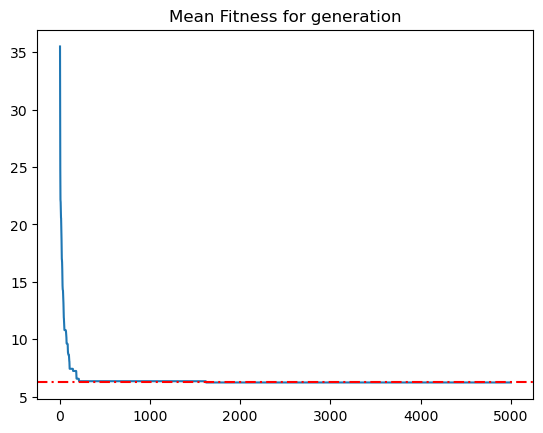

Last Generation Best Fitness :  6.2431


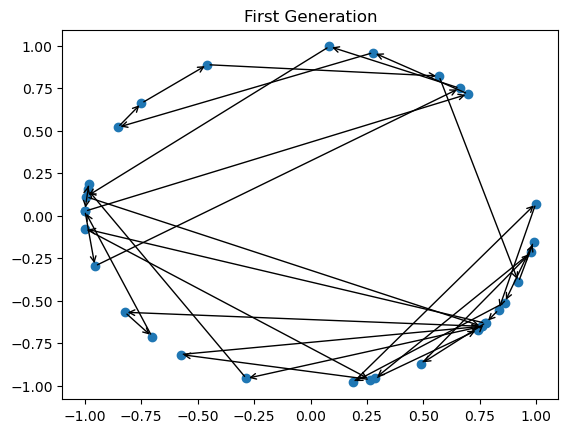

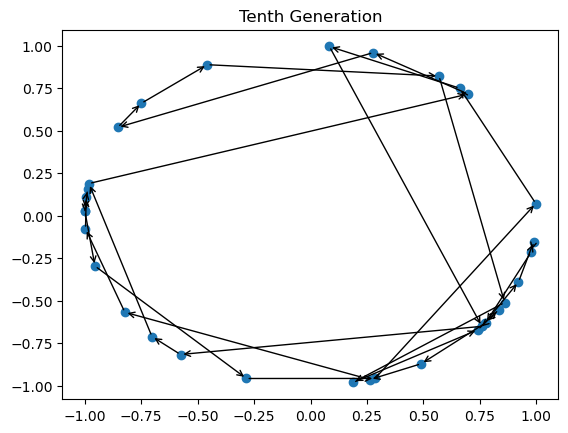

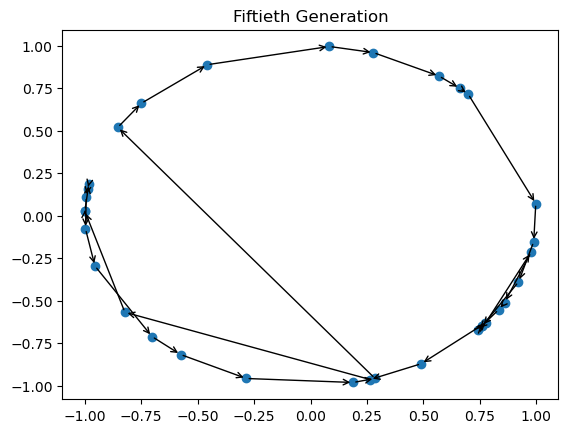

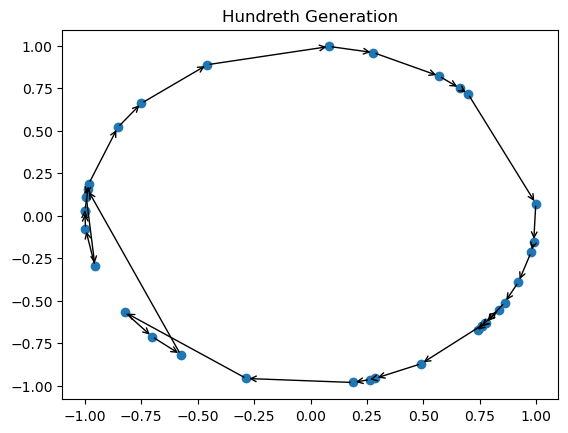

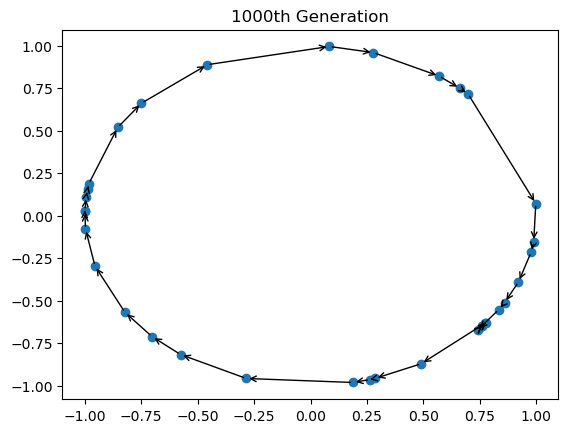

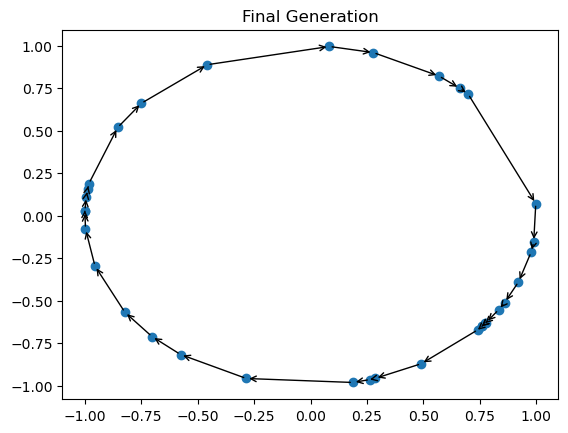

In [3]:
n=FitnessGraph("FitnessCirc.txt",True)
MakePath("StopsCirc.txt","ChromosomesCirc.txt","First Generation",0)
MakePath("StopsCirc.txt","ChromosomesCirc.txt","Tenth Generation",10)
MakePath("StopsCirc.txt","ChromosomesCirc.txt","Fiftieth Generation",50)
MakePath("StopsCirc.txt","ChromosomesCirc.txt","Hundreth Generation",100)
MakePath("StopsCirc.txt","ChromosomesCirc.txt","1000th Generation",1000)
MakePath("StopsCirc.txt","ChromosomesCirc.txt","Final Generation",n-1)

Possiamo vedere che la fitness scende in modo estremamente rapido per le prime 50 generazioni, poi questa discesa rallenta notevolmente, dovento aspettare che una mutazione casuale porti ad un'ottimizzazione del precorso. Notiamo comunque che il percorso ottimale è stato trovato, come di può vedere sia dal disegno della generazione finale sia dal fatto che $\mathcal{F} \approx 2\pi$ per le ultime generazioni.

## <span style="color:blue"> Punti casuali sul piano </span>

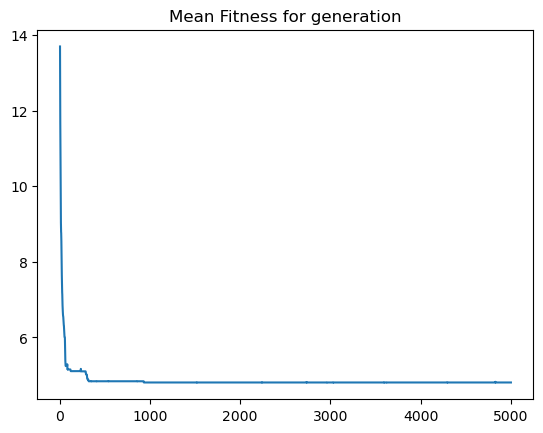

Last Generation Best Fitness :  4.81008


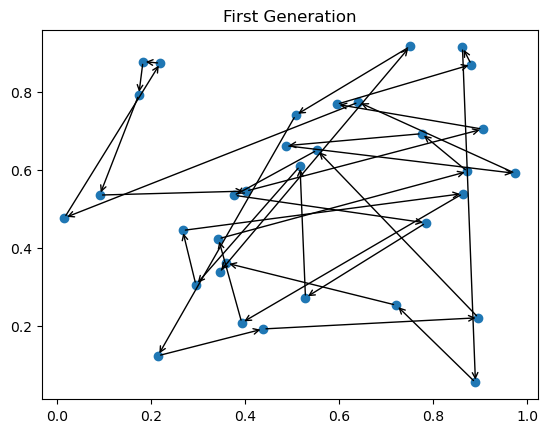

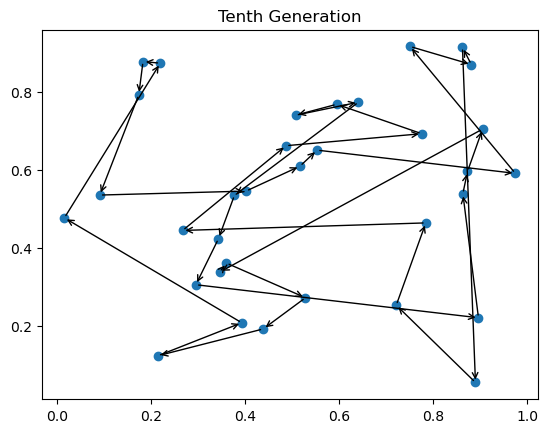

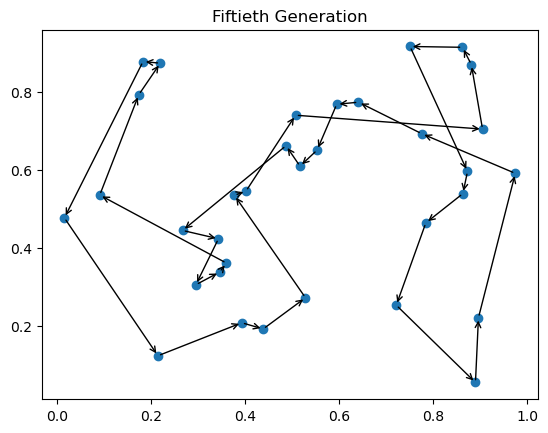

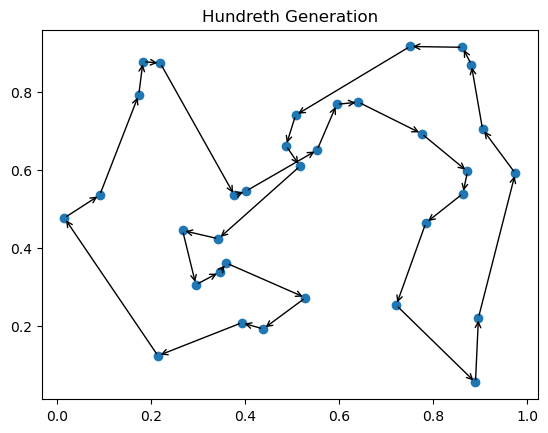

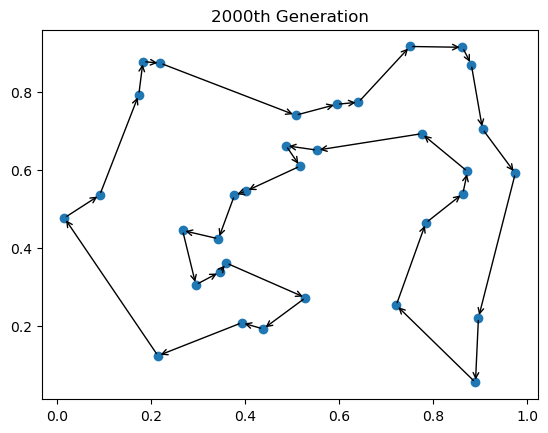

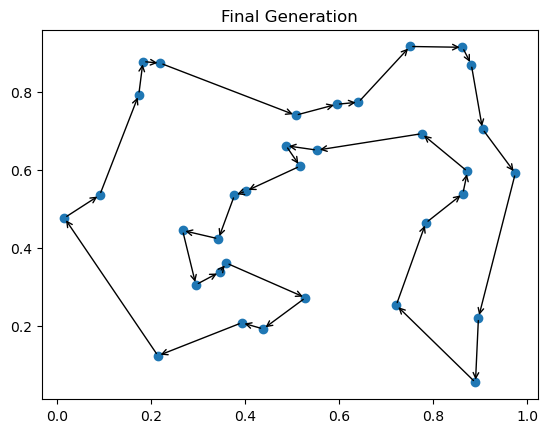

In [4]:
n=FitnessGraph("Fitness.txt",False)
MakePath("Stops.txt","Chromosomes.txt","First Generation",0)
MakePath("Stops.txt","Chromosomes.txt","Tenth Generation",10)
MakePath("Stops.txt","Chromosomes.txt","Fiftieth Generation",50)
MakePath("Stops.txt","Chromosomes.txt","Hundreth Generation",100)
MakePath("Stops.txt","Chromosomes.txt","2000th Generation",2000)
MakePath("Stops.txt","Chromosomes.txt","Final Generation",n-1)

Anche se è difficile esserne completamente sicuri, posso dire che anche in questo caso l'algoritmo ha ottenuto il percorso minimo osservando il disegno qui sopra. Anche in questo caso posso evidenziare come la fitness scenda in modo estremamente rapido per le prime generazioni, per poi stabilizzarsi e scendere solo a causa di alcune scelte mutazioni casuali.